Simulate 20 stars between H=20-24 magnitudes (random) with positions defined by a normal distribution with FHWM=1". The central position of the distribution changes and it is moved on the Y-axis by 7, 14 and 21 arcsec. So, we can see the PSF change when going off axis. Single exposure in the H-band with Texp=100s


In [1]:
# module imports

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import numpy as np
from astropy.wcs import WCS
import astropy.units as u

import scopesim as sim
import scopesim_templates as sim_tp

In [2]:
# generating sources

x_pos = np.random.normal(scale=1., size=20) 
y_pos1 = np.random.normal(scale=1., size=20)
y_pos2 = y_pos1 + 7
y_pos3 = y_pos1 + 14
y_pos4 = y_pos1 + 21


src1 = sim_tp.basic.stars.star_field(n=20, mmin=20*u.mag, mmax=24*u.mag, filter_name="H", width=1,
                                     x=x_pos, y=y_pos1)
src2 = sim_tp.basic.stars.star_field(n=20, mmin=20*u.mag, mmax=24*u.mag, filter_name="H", width=1,
                                     x=x_pos, y=y_pos2)
src3 = sim_tp.basic.stars.star_field(n=20, mmin=20*u.mag, mmax=24*u.mag, filter_name="H", width=1,
                                     x=x_pos, y=y_pos3)
src4 = sim_tp.basic.stars.star_field(n=20, mmin=20*u.mag, mmax=24*u.mag, filter_name="H", width=1,
                                     x=x_pos, y=y_pos4)
src = src1 + src2 + src3 + src4   

In [3]:
psf_effect = sim.effects.psfs.FieldVaryingPSF(filename="AnisoCADO_SCAO_FVPSF_4mas_EsoMedian_20190328.fits", name="SCAO_FV_PSF")

In [6]:
sim.server.database.download_package(["locations/Armazones.zip",
                                      "telescopes/ELT.zip",
                                      "instruments/MAORY.zip",
                                      "instruments/MICADO.zip",] )

#cmd = sim.UserCommands(use_instrument="MICADO", set_modes=["IMG_4mas"])
#micado = sim.OpticalTrain(cmd)

micado = sim.OpticalTrain("MICADO")
dit = 100
ndit = 1

# Modifying observing parameters

micado.cmds["!OBS.dit"] = dit                        # dit & ndit
micado.cmds["!OBS.ndit"] = ndit
micado.cmds["!OBS.filter_name"] = "H"  
micado["detector_window"].include = True
micado["full_detector_array"].include = False
micado["relay_psf"].include = False
micado.optics_manager["default_ro"].add_effect(psf_effect)

# Observing and reading out
micado.observe(src)
hdus = micado.readout() 


Preparing 4 FieldOfViews


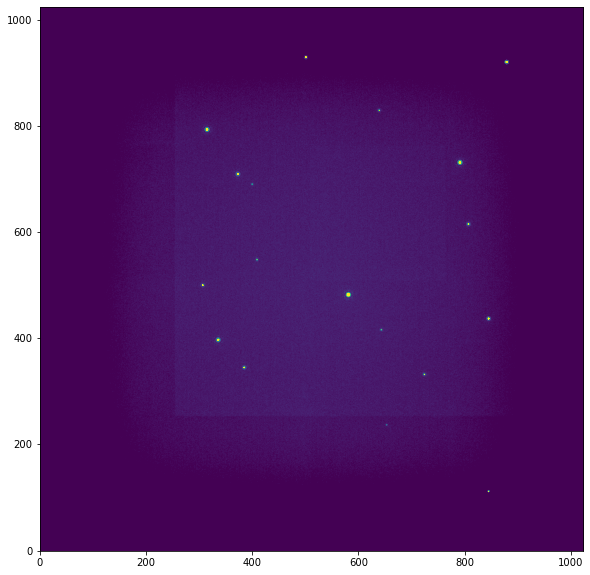

In [8]:
plt.figure(figsize=(10,10))


data = hdus[0][1].data
vmin = np.median(data) 
vmax = vmin + 5*np.std(data)

plt.imshow(data, vmin=vmin, vmax=vmax, origin="lower")
